# COVID-19 Data Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import calendar
sns.set_style('whitegrid')

## Importing dataset

In [2]:
df = pd.read_csv('data/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [4]:
df.shape

(306429, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [7]:
df = df.drop('SNo', axis = 1)
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.isnull().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

### Dealing with date

In [9]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format = '%m/%d/%Y')

In [10]:
day=[]
month=[]
year=[]

for x in df['ObservationDate']:
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)
    
df['year'] = year
df['month'] = month
df['day'] = day

In [11]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,year,month,day
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020,1,22
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020,1,22
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020,1,22


In [12]:
df.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,year,month,day
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0,2021,5,29
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0,2021,5,29
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0,2021,5,29
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0,2021,5,29
306428,2021-05-29,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0,2021,5,29


### Total No. of Countries and their counts

In [13]:
df['Country/Region'].value_counts()

Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: Country/Region, Length: 229, dtype: int64

In [14]:
nepal = df[df['Country/Region'] == 'Nepal']
nepal

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,year,month,day
173,2020-01-25,NaN,Nepal,1/25/20 17:00,1.0,0.0,0.0,2020,1,25
221,2020-01-26,NaN,Nepal,1/26/20 16:00,1.0,0.0,0.0,2020,1,26
269,2020-01-27,NaN,Nepal,1/27/20 23:59,1.0,0.0,0.0,2020,1,27
322,2020-01-28,NaN,Nepal,1/28/20 23:00,1.0,0.0,0.0,2020,1,28
376,2020-01-29,NaN,Nepal,1/29/20 19:30,1.0,0.0,0.0,2020,1,29
...,...,...,...,...,...,...,...,...,...,...
302715,2021-05-25,NaN,Nepal,2021-05-26 04:20:35,528848.0,6700.0,404887.0,2021,5,25
303480,2021-05-26,NaN,Nepal,2021-05-27 04:20:59,535525.0,6845.0,411603.0,2021,5,26
304245,2021-05-27,NaN,Nepal,2021-05-28 04:20:36,542256.0,6951.0,418829.0,2021,5,27
305010,2021-05-28,NaN,Nepal,2021-05-29 04:20:41,549111.0,7047.0,428670.0,2021,5,28


### Year in the dataset

In [15]:
df['year'].value_counts()

2020    192466
2021    113963
Name: year, dtype: int64

### Countrywise cases

In [16]:
countrywise = pd.pivot_table(df, values=['Confirmed', 'Deaths', 'Recovered'], index='Country/Region', aggfunc=max)
countrywise = countrywise.sort_values(by='Confirmed', ascending=False).reset_index()
countrywise.style.background_gradient(cmap='cubehelix')

,Country/Region,Confirmed,Deaths,Recovered
0,France,5863138.000000,108532.000000,331686.000000
1,India,5713215.000000,94030.000000,5339838.000000
2,Turkey,5235978.000000,47271.000000,5094279.000000
3,UK,3910803.000000,112385.000000,4192.000000
4,US,3788713.000000,63236.000000,6399531.000000
5,Argentina,3732263.000000,77108.000000,3288467.000000
6,Brazil,3254893.000000,111123.000000,2895697.000000
7,Iran,2893218.000000,79741.000000,2425033.000000
8,Poland,2871371.000000,73682.000000,2636675.000000
9,Indonesia,1809926.000000,50262.000000,1659974.000000


In [17]:
countrywise[countrywise['Country/Region'] == 'Nepal']

,Country/Region,Confirmed,Deaths,Recovered
33,Nepal,553422.0,7163.0,434750.0


In [18]:
yearwise = pd.pivot_table(df, values=['Confirmed', 'Deaths', 'Recovered'], index='year', aggfunc=max)
yearwise = yearwise.sort_values(by='Confirmed', ascending=False).reset_index()
yearwise

,year,Confirmed,Deaths,Recovered
0,2021,5863138.0,112385.0,5339838.0
1,2020,2616902.0,64267.0,6399531.0


In [19]:
yearwise = pd.pivot_table(df, values=['Confirmed', 'Deaths', 'Recovered'], index=['ObservationDate', 'year', 'month', 'Country/Region'], aggfunc=max)
yearwise = yearwise.sort_values(by='Confirmed', ascending=False).reset_index()
yearwise

,ObservationDate,year,month,Country/Region,Confirmed,Deaths,Recovered
0,2021-05-19,2021,5,France,5863138.0,107390.0,324444.0
1,2021-05-18,2021,5,France,5845010.0,107256.0,323205.0
2,2021-05-17,2021,5,France,5829009.0,107041.0,321874.0
3,2021-05-16,2021,5,France,5825659.0,106845.0,321026.0
4,2021-05-15,2021,5,France,5811711.0,106764.0,320711.0
...,...,...,...,...,...,...,...
87276,2020-08-03,2020,8,Kiribati,0.0,0.0,0.0
87277,2020-03-03,2020,3,China,0.0,0.0,0.0
87278,2020-12-11,2020,12,Kiribati,0.0,0.0,0.0
87279,2020-08-03,2020,8,Samoa,0.0,0.0,0.0


In [20]:
nepal_data = yearwise[yearwise['Country/Region'] == 'Nepal']
nepal_data

,ObservationDate,year,month,Country/Region,Confirmed,Deaths,Recovered
4852,2021-05-29,2021,5,Nepal,553422.0,7163.0,434750.0
4895,2021-05-28,2021,5,Nepal,549111.0,7047.0,428670.0
4964,2021-05-27,2021,5,Nepal,542256.0,6951.0,418829.0
5058,2021-05-26,2021,5,Nepal,535525.0,6845.0,411603.0
5139,2021-05-25,2021,5,Nepal,528848.0,6700.0,404887.0
...,...,...,...,...,...,...,...
86389,2020-01-31,2020,1,Nepal,1.0,0.0,0.0
86408,2020-03-11,2020,3,Nepal,1.0,0.0,1.0
86422,2020-03-02,2020,3,Nepal,1.0,0.0,1.0
86437,2020-03-01,2020,3,Nepal,1.0,0.0,1.0


### Top 10 confirmed cases countries

/tmp/ipykernel_6980/414607374.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_10_confirmed_cases = df.groupby(by='Country/Region').max()[['year', 'Confirmed']].sort_values(by=['Confirmed'], ascending=False).reset_index()


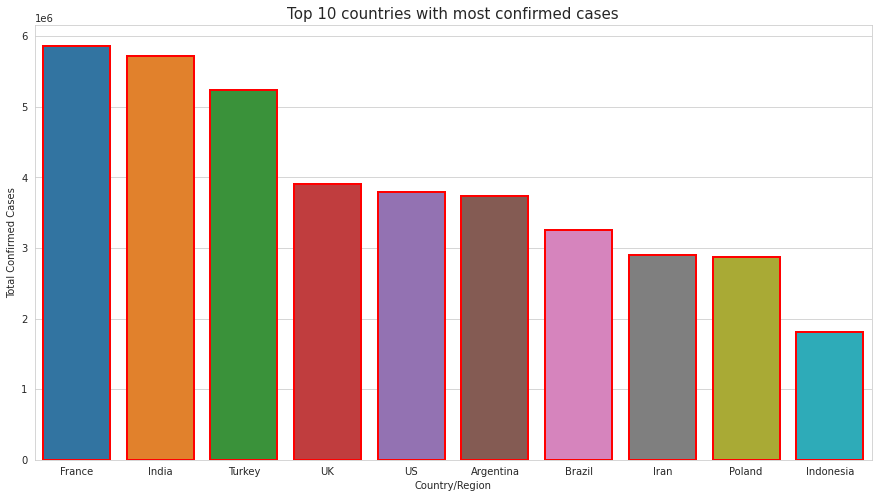

In [21]:
top_10_confirmed_cases = df.groupby(by='Country/Region').max()[['year', 'Confirmed']].sort_values(by=['Confirmed'], ascending=False).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data = top_10_confirmed_cases.iloc[:10], y='Confirmed', x='Country/Region', linewidth=2, edgecolor='red')
plt.title('Top 10 countries with most confirmed cases', size=15)
plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.show()

### Top 10 countries with highest death

/tmp/ipykernel_6980/1972845971.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_10_death_cases = df.groupby(by='Country/Region').max()[['year', 'Deaths']].sort_values(by=['Deaths'], ascending=False).reset_index()


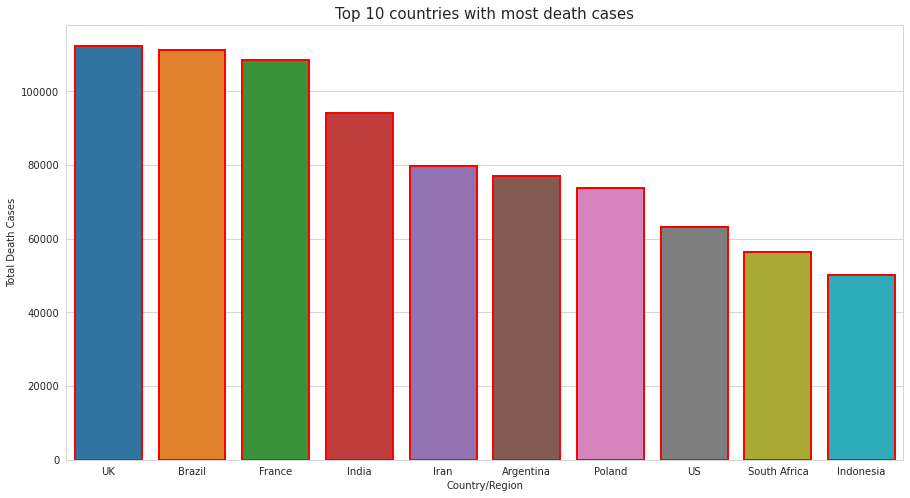

In [22]:
top_10_death_cases = df.groupby(by='Country/Region').max()[['year', 'Deaths']].sort_values(by=['Deaths'], ascending=False).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data = top_10_death_cases.iloc[:10], y='Deaths', x='Country/Region', linewidth=2, edgecolor='red')
plt.title('Top 10 countries with most death cases', size=15)
plt.xlabel('Country/Region')
plt.ylabel('Total Death Cases')
plt.show()